In [1]:
import pandas as pd
import numpy as np

In [2]:
# Reading the data. Statistics from the finals series for every nba champion 1980-- 2018
df = pd.read_csv(r"C:\Users\filoal\Downloads\championsdata.csv")

In [3]:
df.head()

,Year,Team,Game,Win,Home,MP,FG,FGA,FGP,TP,...,FTP,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1980,Lakers,1,1,1,240,48,89,0.539,0,...,0.867,12,31,43,30,5,9,17,24,109
1,1980,Lakers,2,0,1,240,48,95,0.505,0,...,0.667,15,37,52,32,12,7,26,27,104
2,1980,Lakers,3,1,0,240,44,92,0.478,0,...,0.767,22,34,56,20,5,5,20,25,111
3,1980,Lakers,4,0,0,240,44,93,0.473,0,...,0.737,18,31,49,23,12,6,19,22,102
4,1980,Lakers,5,1,1,240,41,91,0.451,0,...,0.788,19,37,56,28,7,6,21,27,108


# DATA CLEANING

In [4]:
# Averaging values for each Year
pd.set_option('display.max_rows', 10)
df_year = df.groupby('Year').mean()
df_year

,Game,Win,Home,MP,FG,FGA,FGP,TP,TPA,TPP,...,FTP,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Year,,,,,,,,,,,,,,,,,,,,,
1980,3.5,0.666667,0.500000,240.000000,45.000000,92.000000,0.489167,0.000000,0.666667,0.000000,...,0.794833,17.166667,34.166667,51.333333,26.666667,9.166667,6.166667,20.000000,24.500000,109.500000
1981,3.5,0.666667,0.500000,240.000000,40.166667,85.333333,0.473500,0.500000,2.833333,0.152833,...,0.719667,16.666667,30.666667,47.333333,22.833333,6.666667,5.333333,16.833333,23.166667,96.500000
1982,3.5,0.666667,0.500000,240.000000,45.500000,91.833333,0.495333,0.166667,1.500000,0.250000,...,0.668667,18.333333,29.000000,47.333333,31.333333,10.666667,7.000000,19.333333,25.500000,112.333333
1983,2.5,1.000000,0.500000,240.000000,43.000000,88.500000,0.487250,0.000000,0.750000,0.000000,...,0.709000,18.000000,30.000000,48.000000,26.000000,11.000000,8.000000,17.000000,22.250000,110.500000
1984,4.0,0.571429,0.571429,247.142857,42.000000,92.857143,0.454429,1.285714,3.285714,0.333286,...,0.797286,17.428571,30.000000,47.428571,24.142857,9.857143,4.571429,15.857143,28.142857,116.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014,3.0,0.800000,0.600000,240.000000,38.200000,72.400000,0.533200,11.000000,23.600000,0.464600,...,0.737800,7.800000,30.000000,37.800000,25.400000,8.000000,3.400000,13.400000,19.800000,105.600000
2015,3.5,0.666667,0.500000,248.333333,36.166667,83.000000,0.437333,11.166667,31.000000,0.366000,...,0.694167,10.500000,33.666667,44.166667,23.000000,8.000000,5.000000,12.666667,24.166667,100.666667
2016,4.0,0.571429,0.428571,240.000000,37.571429,82.428571,0.454571,8.000000,24.285714,0.328143,...,0.725714,11.714286,32.142857,43.857143,18.000000,9.285714,5.428571,13.285714,21.000000,100.428571


In [75]:
# Double checking that each time listed won 4 games
max(df.groupby('Year')['Win'].sum())

4

In [76]:
min(df.groupby('Year')['Win'].sum())

4

In [6]:
# Deleting this coulumn as it doesn't differentiate any teams
del df_year['Win']

In [82]:
# Create new variables for the number of home games played, and the total number of games in the series
df_year['Home Games'] = df.groupby('Year')['Home'].sum()
df_year['Series Length'] = df.groupby('Year')['Game'].max()

In [83]:
df_year

,MP,FG,FGA,FGP,TP,TPA,TPP,FT,FTA,FTP,...,TRB,AST,STL,BLK,TOV,PF,PTS,Series Length,Home Games,Series_Length2
Year,,,,,,,,,,,,,,,,,,,,,
1980,240.000000,45.000000,92.000000,0.489167,0.000000,0.666667,0.000000,19.500000,24.000000,0.794833,...,51.333333,26.666667,9.166667,6.166667,20.000000,24.500000,109.500000,6,3,6
1981,240.000000,40.166667,85.333333,0.473500,0.500000,2.833333,0.152833,15.666667,21.500000,0.719667,...,47.333333,22.833333,6.666667,5.333333,16.833333,23.166667,96.500000,6,3,6
1982,240.000000,45.500000,91.833333,0.495333,0.166667,1.500000,0.250000,21.166667,31.500000,0.668667,...,47.333333,31.333333,10.666667,7.000000,19.333333,25.500000,112.333333,6,3,6
1983,240.000000,43.000000,88.500000,0.487250,0.000000,0.750000,0.000000,24.500000,34.500000,0.709000,...,48.000000,26.000000,11.000000,8.000000,17.000000,22.250000,110.500000,4,2,4
1984,247.142857,42.000000,92.857143,0.454429,1.285714,3.285714,0.333286,30.714286,38.571429,0.797286,...,47.428571,24.142857,9.857143,4.571429,15.857143,28.142857,116.000000,7,4,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014,240.000000,38.200000,72.400000,0.533200,11.000000,23.600000,0.464600,18.200000,24.400000,0.737800,...,37.800000,25.400000,8.000000,3.400000,13.400000,19.800000,105.600000,5,3,5
2015,248.333333,36.166667,83.000000,0.437333,11.166667,31.000000,0.366000,17.166667,24.833333,0.694167,...,44.166667,23.000000,8.000000,5.000000,12.666667,24.166667,100.666667,6,3,6
2016,240.000000,37.571429,82.428571,0.454571,8.000000,24.285714,0.328143,17.285714,23.857143,0.725714,...,43.857143,18.000000,9.285714,5.428571,13.285714,21.000000,100.428571,7,3,7


In [13]:
# Checking for nulls
df_year.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39 entries, 1980 to 2018
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MP             39 non-null     float64
 1   FG             39 non-null     float64
 2   FGA            39 non-null     float64
 3   FGP            39 non-null     float64
 4   TP             39 non-null     float64
 5   TPA            39 non-null     float64
 6   TPP            39 non-null     float64
 7   FT             39 non-null     float64
 8   FTA            39 non-null     float64
 9   FTP            39 non-null     float64
 10  ORB            39 non-null     float64
 11  DRB            39 non-null     float64
 12  TRB            39 non-null     float64
 13  AST            39 non-null     float64
 14  STL            39 non-null     float64
 15  BLK            39 non-null     float64
 16  TOV            39 non-null     float64
 17  PF             39 non-null     float64
 18  PTS    

In [14]:
df_year.describe()

,MP,FG,FGA,FGP,TP,TPA,TPP,FT,FTA,FTP,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Series Length,Home Games
count,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,...,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000
mean,242.432845,37.901404,80.840171,0.468691,5.463309,14.766178,0.336707,19.984676,27.183700,0.736759,...,30.313797,42.530769,22.649939,7.835897,5.370696,13.626313,22.808547,101.250794,5.641026,2.846154
std,3.338649,5.004814,7.139767,0.032332,3.638413,9.040581,0.104872,3.771879,5.125591,0.063924,...,2.356414,3.336470,4.493739,1.611592,1.502859,2.433574,2.636320,10.115262,0.959363,0.670368
min,240.000000,30.000000,67.400000,0.415667,0.000000,0.666667,0.000000,13.166667,16.833333,0.559667,...,24.000000,37.500000,14.571429,4.000000,3.000000,9.250000,18.000000,84.800000,4.000000,2.000000
25%,240.000000,32.916667,74.773810,0.443800,2.166667,6.273810,0.305167,17.154762,23.678571,0.701179,...,28.916667,40.166667,18.333333,6.916667,4.283333,12.214286,20.875000,92.916667,5.000000,2.000000
50%,240.000000,38.000000,79.666667,0.461500,5.333333,15.250000,0.358750,19.500000,25.833333,0.739600,...,30.000000,42.428571,23.000000,7.833333,5.166667,13.166667,22.285714,100.666667,6.000000,3.000000
75%,244.583333,42.300000,86.275000,0.491667,7.642857,20.333333,0.396333,21.845238,31.125000,0.775333,...,32.171429,44.666667,26.458333,9.166667,5.816667,15.200000,24.450000,108.333333,6.000000,3.000000
max,252.500000,46.666667,92.857143,0.533200,14.200000,37.200000,0.468800,30.714286,38.571429,0.866000,...,34.166667,51.333333,32.000000,11.000000,9.833333,20.000000,28.750000,121.600000,7.000000,4.000000


In [15]:
# Scaling the data
df_scaled = df_year
cols = df_scaled.columns
cols=cols.astype(str)

from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
df_scaled = ms.fit_transform(df_scaled)

df_scaled = pd.DataFrame(df_scaled, columns=[cols])
df_scaled

,MP,FG,FGA,FGP,TP,TPA,TPP,FT,FTA,FTP,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Series Length,Home Games
0,0.000000,0.900000,0.966330,0.625355,0.000000,0.000000,0.000000,0.360923,0.329682,0.767682,...,1.000000,1.000000,0.693989,0.738095,0.463415,1.000000,0.604651,0.671196,0.666667,0.5
1,0.000000,0.610000,0.704452,0.492059,0.035211,0.059307,0.326010,0.142469,0.214677,0.522307,...,0.655738,0.710843,0.474044,0.380952,0.341463,0.705426,0.480620,0.317935,0.666667,0.5
2,0.000000,0.930000,0.959783,0.677822,0.011737,0.022810,0.533276,0.455902,0.674699,0.355822,...,0.491803,0.710843,0.961749,0.952381,0.585366,0.937984,0.697674,0.748188,0.666667,0.5
3,0.000000,0.780000,0.828844,0.609047,0.000000,0.002281,0.000000,0.645862,0.812705,0.487486,...,0.590164,0.759036,0.655738,1.000000,0.731707,0.720930,0.395349,0.698370,0.000000,0.0
4,0.571429,0.720000,1.000000,0.329795,0.090543,0.071689,0.710934,1.000000,1.000000,0.775688,...,0.590164,0.717728,0.549180,0.836735,0.229965,0.614618,0.943522,0.847826,1.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34,0.000000,0.492000,0.196409,1.000000,0.774648,0.627737,0.991041,0.286839,0.348083,0.581502,...,0.590164,0.021687,0.621311,0.571429,0.058537,0.386047,0.167442,0.565217,0.333333,0.5
35,0.666667,0.370000,0.612795,0.184345,0.786385,0.830292,0.780717,0.227951,0.368018,0.439064,...,0.950820,0.481928,0.483607,0.571429,0.292683,0.317829,0.573643,0.431159,0.666667,0.5
36,0.000000,0.454286,0.590348,0.331010,0.563380,0.646507,0.699963,0.234735,0.323111,0.542049,...,0.800937,0.459552,0.196721,0.755102,0.355401,0.375415,0.279070,0.424689,1.000000,0.5
37,0.000000,0.792000,0.927048,0.518434,1.000000,1.000000,0.818259,0.446404,0.403286,0.845267,...,0.944262,0.600000,0.850820,0.514286,0.204878,0.386047,0.595349,1.000000,0.333333,0.5


# KMeans Cluster Analysis

In [98]:
# Starting with just 2 clusters
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0) 

kmeans.fit(df_scaled)

C:\Users\filoal\Downloads\AnacondaNew\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


KMeans(n_clusters=2, random_state=0)

In [99]:
kmeans.cluster_centers_

array([[0.26190476, 0.71695   , 0.72630004, 0.63139332, 0.30722669,
        0.28935089, 0.68459212, 0.41785617, 0.49963308, 0.59994326,
        0.55875642, 0.63245902, 0.44474182, 0.6307582 , 0.58636054,
        0.41991289, 0.42902547, 0.5640753 , 0.65108696, 0.43333333,
        0.3       ],
       [0.12380952, 0.21843609, 0.31916632, 0.26140294, 0.46633309,
        0.48760359, 0.75364312, 0.35768764, 0.45140947, 0.55511671,
        0.3806134 , 0.6089979 , 0.27833137, 0.28748202, 0.5075904 ,
        0.2701082 , 0.38401818, 0.32439238, 0.2322382 , 0.66666667,
        0.55263158]])

In [107]:
labels = kmeans.labels_
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0])

In [112]:
df_year['2 Clusters'] = kmeans.labels_
df_year['Year'] = range(1980, 2019)
df_year

,MP,FG,FGA,FGP,TP,TPA,TPP,FT,FTA,FTP,...,BLK,TOV,PF,PTS,Series Length,Home Games,Series_Length2,3 Clusters,2 Clusters,Year
Year,,,,,,,,,,,,,,,,,,,,,
1980,240.000000,45.000000,92.000000,0.489167,0.000000,0.666667,0.000000,19.500000,24.000000,0.794833,...,6.166667,20.000000,24.500000,109.500000,6,3,6,2,0,1980
1981,240.000000,40.166667,85.333333,0.473500,0.500000,2.833333,0.152833,15.666667,21.500000,0.719667,...,5.333333,16.833333,23.166667,96.500000,6,3,6,2,0,1981
1982,240.000000,45.500000,91.833333,0.495333,0.166667,1.500000,0.250000,21.166667,31.500000,0.668667,...,7.000000,19.333333,25.500000,112.333333,6,3,6,2,0,1982
1983,240.000000,43.000000,88.500000,0.487250,0.000000,0.750000,0.000000,24.500000,34.500000,0.709000,...,8.000000,17.000000,22.250000,110.500000,4,2,4,2,0,1983
1984,247.142857,42.000000,92.857143,0.454429,1.285714,3.285714,0.333286,30.714286,38.571429,0.797286,...,4.571429,15.857143,28.142857,116.000000,7,4,7,2,0,1984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014,240.000000,38.200000,72.400000,0.533200,11.000000,23.600000,0.464600,18.200000,24.400000,0.737800,...,3.400000,13.400000,19.800000,105.600000,5,3,5,1,1,2014
2015,248.333333,36.166667,83.000000,0.437333,11.166667,31.000000,0.366000,17.166667,24.833333,0.694167,...,5.000000,12.666667,24.166667,100.666667,6,3,6,1,1,2015
2016,240.000000,37.571429,82.428571,0.454571,8.000000,24.285714,0.328143,17.285714,23.857143,0.725714,...,5.428571,13.285714,21.000000,100.428571,7,3,7,0,1,2016


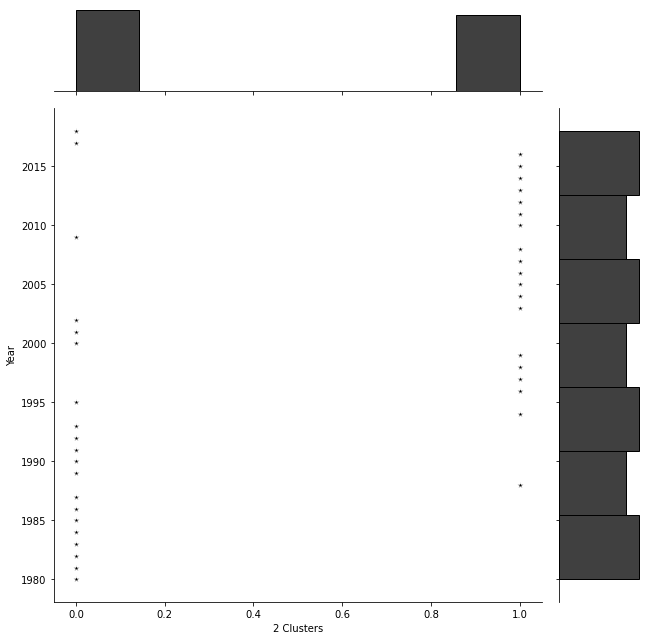

In [113]:
# Visualizing the results by year
import seaborn as sns
# use the function regplot to make a scatterplot
sns.jointplot(y=df_year["Year"], x=df_year["2 Clusters"], height = 9, color = 'k', marker = '*')

C:\Users\filoal\Downloads\AnacondaNew\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='2 Clusters', ylabel='Series Length'>

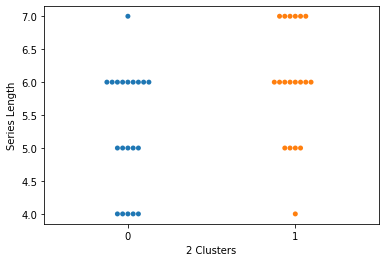

In [118]:
sns.swarmplot(df_year['2 Clusters'],df_year['Series Length'])

C:\Users\filoal\Downloads\AnacondaNew\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='2 Clusters', ylabel='PTS'>

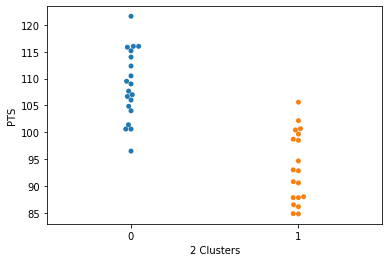

In [116]:
sns.swarmplot(df_year['2 Clusters'],df_year['PTS'])

In [33]:
# Using the elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, random_state = 42)
    kmeans.fit(df_scaled)
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)

C:\Users\filoal\Downloads\AnacondaNew\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\filoal\Downloads\AnacondaNew\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\filoal\Downloads\AnacondaNew\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\filoal\Downloads\AnacondaNew\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tupl

C:\Users\filoal\Downloads\AnacondaNew\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


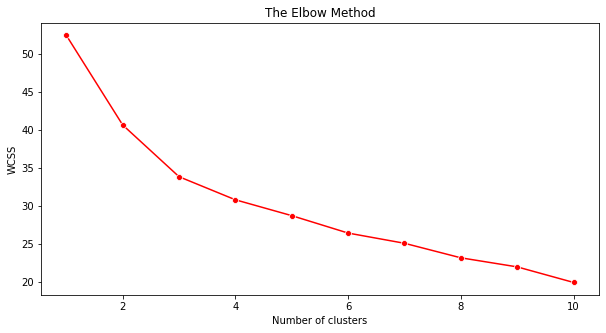

In [36]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
sns.lineplot(range(1, 11), wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

3 Cluster appears to be at the elbow of this graph

In [38]:
kmeans3 = KMeans(n_clusters = 3, random_state = 42)

In [39]:
kmeans3.fit(df_scaled)

C:\Users\filoal\Downloads\AnacondaNew\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [40]:
kmeans3.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1])

In [70]:
df_year['3 Clusters'] = kmeans3.labels_

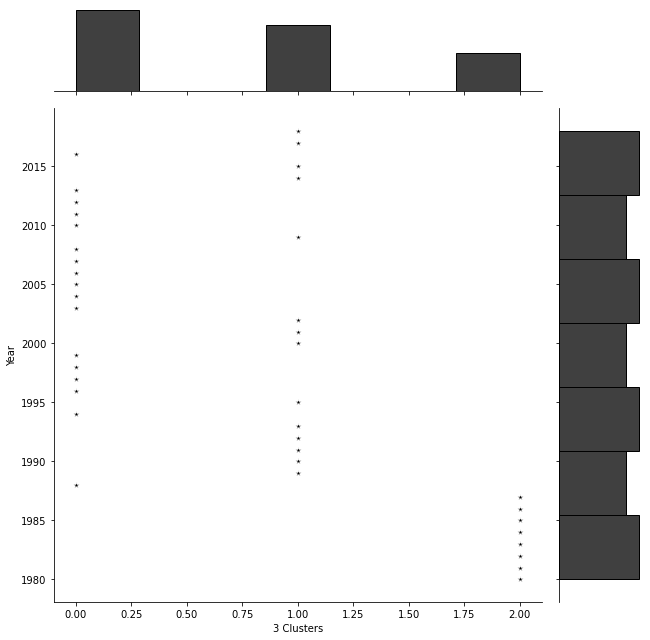

In [119]:
sns.jointplot(y=df_year["Year"], x=df_year["3 Clusters"], height = 9, color = 'k', marker = '*')

In [73]:
# Checking the quality of the model fit
kmeans3.inertia_

33.81990821833088

The lower the inertia, the better the model fit. 33 is a moderate score, so this fit is relatively good

In [88]:
df_year.columns

Index(['MP', 'FG', 'FGA', 'FGP', 'TP', 'TPA', 'TPP', 'FT', 'FTA', 'FTP', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Series Length',
       'Home Games', 'Series_Length2', '3 Clusters'],
      dtype='object')

# VISUALIZING USING SEABORN

C:\Users\filoal\Downloads\AnacondaNew\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='3 Clusters', ylabel='FGA'>

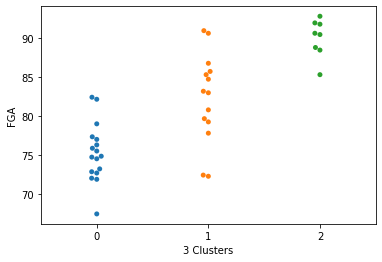

In [86]:
sns.swarmplot(df_year['3 Clusters'],df_year['FGA'])

C:\Users\filoal\Downloads\AnacondaNew\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='3 Clusters', ylabel='Home Games'>

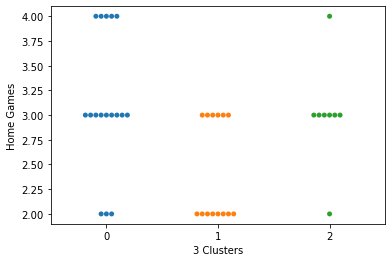

In [89]:
sns.swarmplot(df_year['3 Clusters'],df_year['Home Games'])

C:\Users\filoal\Downloads\AnacondaNew\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='3 Clusters', ylabel='Series Length'>

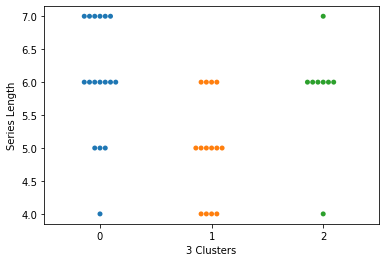

In [121]:
sns.swarmplot(df_year['3 Clusters'],df_year['Series Length'])

C:\Users\filoal\Downloads\AnacondaNew\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='3 Clusters', ylabel='PTS'>

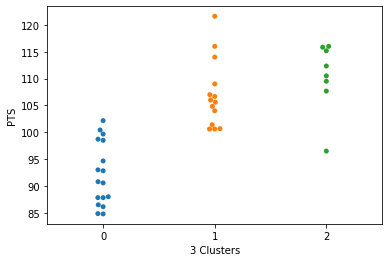

In [90]:
sns.swarmplot(df_year['3 Clusters'],df_year['PTS'])

C:\Users\filoal\Downloads\AnacondaNew\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='3 Clusters', ylabel='FTA'>

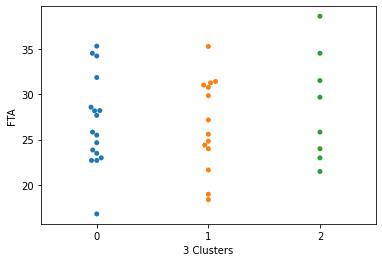

In [93]:
sns.swarmplot(df_year['3 Clusters'],df_year['FTA'])

The visualizations clearly show that Cluster 2 represents an old-school style of basketball. All teams in the cluster are from the 8 earliest teams in this dataset, 1980-1987. This makes sense as the type of basketball being played changed over the years, and this would be reflected in the statistics from the finals series. The remaining 2 clusters seem to be a mix of years from the remaining champions from 1988-2018. Perhaps Cluster 1 was more successful than Cluster 0, scoring more points and needing less total games to win 4. No team from Cluster 1 needed a 7 game series to become champions, as opposed to 6 teams from Cluster 0 that did. And 4 teams from Cluster 1 went a perfect 4-0, for a series length of 4, while only 1 team from Cluster 0 did so.

Future work could bring in additional data from the regular season. This would give allow for a larger sample size of games to be included in the K-means Clustering.

This analysis is interesting because many basketball fans could've easily predicted that the change from old-school basketball to new-school basketball would be reflected in the clustering. However, it may be less obvious that of the new-school basketball teams, there might be an additional distinction between teams which fit into the cluster of being highly successful in the finals vs those that won less convincingly, scoring less points and needing a longer series to win 4 games.